In [99]:
import pandas as pd
import datetime

In [2]:
df=pd.read_csv('titanic.csv')

In [3]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [5]:
##missing data at random
df[df['Embarked'].isnull()]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
61,62,1,1,"Icard, Miss. Amelie",female,38.0,0,0,113572,80.0,B28,NaN
829,830,1,1,"Stone, Mrs. George Nelson (Martha Evelyn)",female,62.0,0,0,113572,80.0,B28,NaN


In [6]:
##missing data not at random
import numpy as np
df['cabin_null'] = np.where(df['Cabin'].isnull(),1,0)

##find the percentage of null values
df['cabin_null'].mean()

0.7710437710437711

In [7]:
df.groupby(['Survived'])['cabin_null'].mean()

Survived
0    0.876138
1    0.602339
Name: cabin_null, dtype: float64

In [8]:
df = pd.read_csv('titanic.csv', usecols=['Age', 'Fare', 'Survived'])
df.head()

,Survived,Age,Fare
0,0,22.0,7.2500
1,1,38.0,71.2833
2,1,26.0,7.9250
3,1,35.0,53.1000
4,0,35.0,8.0500


In [9]:
## Lets go and see the percentage of missing values
df.isnull().mean()

Survived    0.000000
Age         0.198653
Fare        0.000000
dtype: float64

In [10]:
def imput_nan(df,variable,median):
    df[variable+"_median"] = df[variable].fillna(median)

In [11]:
median = df.Age.median()
median

28.0

In [12]:
imput_nan(df,'Age',median)
df.head()

,Survived,Age,Fare,Age_median
0,0,22.0,7.2500,22.0
1,1,38.0,71.2833,38.0
2,1,26.0,7.9250,26.0
3,1,35.0,53.1000,35.0
4,0,35.0,8.0500,35.0


In [13]:
print(df['Age'].std())
print(df['Age_median'].std())

14.526497332334042
13.019696550973201


In [14]:
import matplotlib.pyplot as plt
%matplotlib inline

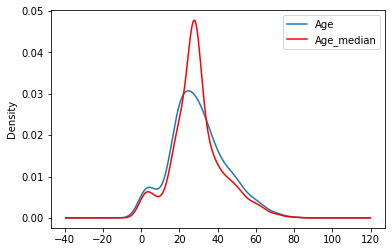

In [15]:
fig = plt.figure()
ax  = fig.add_subplot(111)
df['Age'].plot(kind='kde',ax=ax) #kernel_density_estimator
df.Age_median.plot(kind='kde',ax=ax,color='red')
lines, labels = ax.get_legend_handles_labels()
ax.legend(lines, labels, loc='best')

In [16]:
### Random Sample Imputation

In [17]:
import numpy as np
import pandas as pd
df = pd.read_csv('titanic.csv', usecols=['Age', 'Fare','Survived'])
df.head()

,Survived,Age,Fare
0,0,22.0,7.2500
1,1,38.0,71.2833
2,1,26.0,7.9250
3,1,35.0,53.1000
4,0,35.0,8.0500


In [18]:
df.isnull().sum()

Survived      0
Age         177
Fare          0
dtype: int64

In [19]:
df.isnull().mean()

Survived    0.000000
Age         0.198653
Fare        0.000000
dtype: float64

In [20]:
df['Age'].dropna().sample(df['Age'].isnull().sum(),random_state=0)

423    28.00
177    50.00
305     0.92
292    36.00
889    26.00
       ...  
539    22.00
267    25.00
352    15.00
99     34.00
689    15.00
Name: Age, Length: 177, dtype: float64

In [21]:
df[df['Age'].isnull()].index

Int64Index([  5,  17,  19,  26,  28,  29,  31,  32,  36,  42,
            ...
            832, 837, 839, 846, 849, 859, 863, 868, 878, 888],
           dtype='int64', length=177)

In [22]:
def imput_nan(df,variable,median):
    df[variable+"_median"] = df[variable].fillna(median)
    df[variable+"_random"] = df[variable]
    random_sample = df[variable].dropna().sample(df[variable].isnull().sum(),random_state=0) # it will have random sample to fill na
    ## pandas need to have same index in order to merge the dataset
    random_sample.index = df[df[variable].isnull()].index
    df.loc[df[variable].isnull(), variable+'_random'] = random_sample

In [23]:
imput_nan(df,'Age', 28)

In [24]:
df.head()

,Survived,Age,Fare,Age_median,Age_random
0,0,22.0,7.2500,22.0,22.0
1,1,38.0,71.2833,38.0,38.0
2,1,26.0,7.9250,26.0,26.0
3,1,35.0,53.1000,35.0,35.0
4,0,35.0,8.0500,35.0,35.0


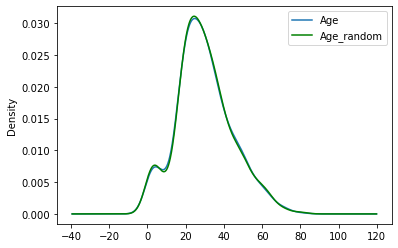

In [25]:
fig = plt.figure()
ax  = fig.add_subplot(111)
df['Age'].plot(kind='kde', ax=ax)
df.Age_random.plot(kind='kde', ax=ax, color='green')
lines, labels = ax.get_legend_handles_labels()
ax.legend(lines, labels, loc='best')

In [26]:
## Capturing NAN values

In [27]:
df = pd.read_csv('titanic.csv', usecols=['Age', 'Fare','Survived'])
df.head()

,Survived,Age,Fare
0,0,22.0,7.2500
1,1,38.0,71.2833
2,1,26.0,7.9250
3,1,35.0,53.1000
4,0,35.0,8.0500


In [28]:
df['Age_NAN'] = np.where(df['Age'].isnull(),1,0)
df.head()

,Survived,Age,Fare,Age_NAN
0,0,22.0,7.2500,0
1,1,38.0,71.2833,0
2,1,26.0,7.9250,0
3,1,35.0,53.1000,0
4,0,35.0,8.0500,0


In [29]:
df['Age'].fillna(df.Age.median(), inplace=True)

In [30]:
## End of distribution imputation
df = pd.read_csv('titanic.csv', usecols=['Age', 'Fare','Survived'])
df.head()

,Survived,Age,Fare
0,0,22.0,7.2500
1,1,38.0,71.2833
2,1,26.0,7.9250
3,1,35.0,53.1000
4,0,35.0,8.0500


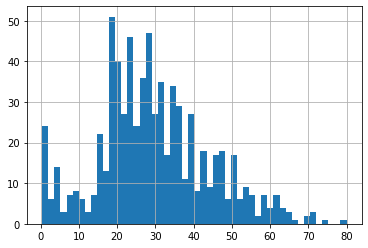

In [31]:
df.Age.hist(bins=50)

In [32]:
extreme = df.Age.mean() + 3 * df.Age.std()

In [33]:
import seaborn as sns

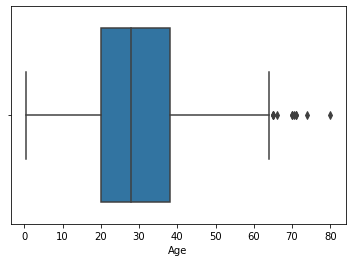

In [34]:
sns.boxplot('Age',data=df)

In [35]:
def impute_nan(df, variable, median, extreme):
    df[variable+'_end_distribution'] = df[variable].fillna(extreme)
    df[variable].fillna(median, inplace=True)

In [36]:
impute_nan(df,'Age',df.Age.median(), extreme)

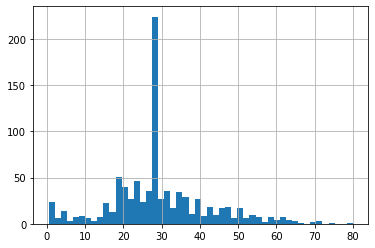

In [37]:
df['Age'].hist(bins=50)

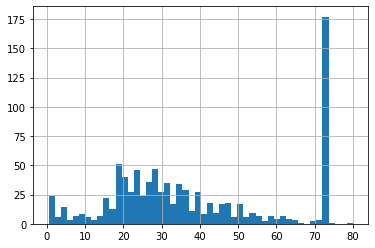

In [38]:
df['Age_end_distribution'].hist(bins=50)

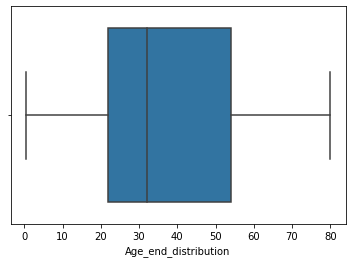

In [39]:
sns.boxplot('Age_end_distribution', data=df)

In [40]:
## Arbitrary Value Imputation

In [41]:
import pandas as pd

In [42]:
df = pd.read_csv('titanic.csv', usecols=['Age', 'Fare','Survived'])

In [43]:
df.head()

,Survived,Age,Fare
0,0,22.0,7.2500
1,1,38.0,71.2833
2,1,26.0,7.9250
3,1,35.0,53.1000
4,0,35.0,8.0500


In [44]:
def impute_nan(df, variable):
    df[variable+'_zero'] = df[variable].fillna(0)
    df[variable+'_hundred'] = df[variable].fillna(100)

In [45]:
### How to handle categorical value
### Frequent Category Imputation

In [46]:
df = pd.read_csv('loan.csv', usecols=['BsmtQual', 'FireplaceQu','GarageType', 'SalePrice'])

In [47]:
df.head()

,BsmtQual,FireplaceQu,GarageType,SalePrice
0,Gd,NaN,Attchd,208500
1,Gd,TA,Attchd,181500
2,Gd,TA,Attchd,223500
3,TA,Gd,Detchd,140000
4,Gd,TA,Attchd,250000


In [48]:
df.isnull().sum()

BsmtQual        37
FireplaceQu    690
GarageType      81
SalePrice        0
dtype: int64

In [49]:
df.isnull().mean().sort_values(ascending=True)

SalePrice      0.000000
BsmtQual       0.025342
GarageType     0.055479
FireplaceQu    0.472603
dtype: float64

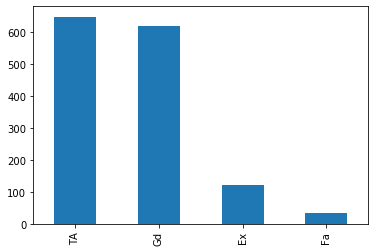

In [50]:
df['BsmtQual'].value_counts().plot.bar()

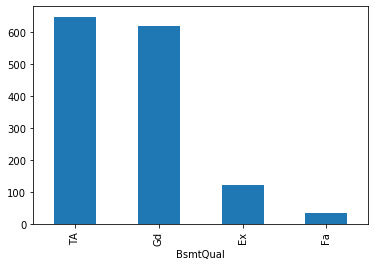

In [51]:
df.groupby(['BsmtQual'])['BsmtQual'].count().sort_values(ascending=False).plot.bar()

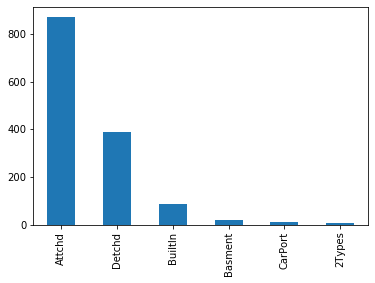

In [52]:
df['GarageType'].value_counts().plot.bar()

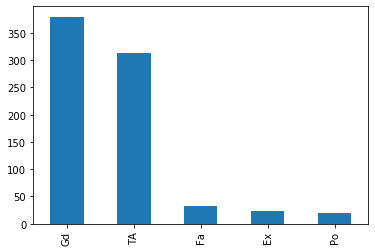

In [53]:
df['FireplaceQu'].value_counts().plot.bar()

In [54]:
#### Replacing function
def impute_nan(df, variable):
    most_frequent_category = df[variable].value_counts().index[0]
    df[variable].fillna(most_frequent_category, inplace=True)

In [55]:
for features in ['BsmtQual', 'FireplaceQu', 'GarageType']:
    impute_nan(df,features)

In [56]:
df.isnull().mean()

BsmtQual       0.0
FireplaceQu    0.0
GarageType     0.0
SalePrice      0.0
dtype: float64

In [57]:
df['FireplaceQu'].mode()[0]  ##we can also use NAN

'Gd'

In [58]:
### Adding a variable to capture a NAN 

In [59]:
df = pd.read_csv('loan.csv', usecols=['BsmtQual', 'FireplaceQu','GarageType', 'SalePrice'])
df.head()

,BsmtQual,FireplaceQu,GarageType,SalePrice
0,Gd,NaN,Attchd,208500
1,Gd,TA,Attchd,181500
2,Gd,TA,Attchd,223500
3,TA,Gd,Detchd,140000
4,Gd,TA,Attchd,250000


In [60]:
import numpy as np
df['BsmtQual_Var'] = np.where(df['BsmtQual'].isnull(),1,0)

In [61]:
df.head()

,BsmtQual,FireplaceQu,GarageType,SalePrice,BsmtQual_Var
0,Gd,NaN,Attchd,208500,0
1,Gd,TA,Attchd,181500,0
2,Gd,TA,Attchd,223500,0
3,TA,Gd,Detchd,140000,0
4,Gd,TA,Attchd,250000,0


In [62]:
frequent = df['BsmtQual'].mode()[0]

In [63]:
df['BsmtQual'].fillna(frequent, inplace=True)

In [64]:
df.head()

,BsmtQual,FireplaceQu,GarageType,SalePrice,BsmtQual_Var
0,Gd,NaN,Attchd,208500,0
1,Gd,TA,Attchd,181500,0
2,Gd,TA,Attchd,223500,0
3,TA,Gd,Detchd,140000,0
4,Gd,TA,Attchd,250000,0


In [65]:
df['FireplaceQu_Var'] = np.where(df['FireplaceQu'].isnull(),1,0)
frequent = df['FireplaceQu'].mode()[0]
df['FireplaceQu'].fillna(frequent, inplace=True)

In [66]:
df.head()

,BsmtQual,FireplaceQu,GarageType,SalePrice,BsmtQual_Var,FireplaceQu_Var
0,Gd,Gd,Attchd,208500,0,1
1,Gd,TA,Attchd,181500,0,0
2,Gd,TA,Attchd,223500,0,0
3,TA,Gd,Detchd,140000,0,0
4,Gd,TA,Attchd,250000,0,0


In [67]:
### Suppose if you have more frequent categories, we just replace NAN with a new category

In [68]:
df = pd.read_csv('loan.csv', usecols=['BsmtQual', 'FireplaceQu','GarageType', 'SalePrice'])
df.head()

,BsmtQual,FireplaceQu,GarageType,SalePrice
0,Gd,NaN,Attchd,208500
1,Gd,TA,Attchd,181500
2,Gd,TA,Attchd,223500
3,TA,Gd,Detchd,140000
4,Gd,TA,Attchd,250000


In [69]:
def impute_nan(df, variable):
    df[variable+'newVar'] = np.where(df[variable].isnull(), "Missing",df[variable])

In [70]:
for features in ['BsmtQual', 'FireplaceQu', 'GarageType']:
    impute_nan(df,features)

In [71]:
df.head()

,BsmtQual,FireplaceQu,GarageType,SalePrice,BsmtQualnewVar,FireplaceQunewVar,GarageTypenewVar
0,Gd,NaN,Attchd,208500,Gd,Missing,Attchd
1,Gd,TA,Attchd,181500,Gd,TA,Attchd
2,Gd,TA,Attchd,223500,Gd,TA,Attchd
3,TA,Gd,Detchd,140000,TA,Gd,Detchd
4,Gd,TA,Attchd,250000,Gd,TA,Attchd


In [72]:
df.drop(['BsmtQual', 'FireplaceQu', 'GarageType'], axis=1)

,SalePrice,BsmtQualnewVar,FireplaceQunewVar,GarageTypenewVar
0,208500,Gd,Missing,Attchd
1,181500,Gd,TA,Attchd
2,223500,Gd,TA,Attchd
3,140000,TA,Gd,Detchd
4,250000,Gd,TA,Attchd
...,...,...,...,...
1455,175000,Gd,TA,Attchd
1456,210000,Gd,TA,Attchd
1457,266500,TA,Gd,Attchd
1458,142125,TA,Missing,Attchd


In [82]:
### One Hot Encoding

In [74]:
df = pd.read_csv('titanic.csv', usecols=['Sex'])
df.head()

,Sex
0,male
1,female
2,female
3,female
4,male


In [76]:
pd.get_dummies(df, drop_first=True).head()

,Sex_male
0,1
1,0
2,0
3,0
4,1


In [77]:
df = pd.read_csv('titanic.csv', usecols=['Embarked'])
df['Embarked'].unique()

array(['S', 'C', 'Q', nan], dtype=object)

In [78]:
df.dropna(inplace=True)

In [80]:
pd.get_dummies(df,drop_first=True).head()

,Embarked_Q,Embarked_S
0,0,1
1,0,0
2,0,1
3,0,1
4,0,1


In [81]:
### Onehotencoding with many categories in a feature

In [85]:
df = pd.read_csv('mercedes.csv', usecols=['X0', 'X1', 'X2', 'X3', 'X4', 'X5', 'X6'])

In [86]:
df.head()

,X0,X1,X2,X3,X4,X5,X6
0,k,v,at,a,d,u,j
1,k,t,av,e,d,y,l
2,az,w,n,c,d,x,j
3,az,t,n,f,d,x,l
4,az,v,n,f,d,h,d


In [88]:
for i in df.columns:
    print(len(df[i].value_counts()))

47
27
44
7
4
29
12


In [89]:
df.X1.value_counts().sort_values(ascending=False).head(10) ## Take most 10 frequent categories

aa    833
s     598
b     592
l     590
v     408
Name: X1, dtype: int64

In [91]:
lst_10 = df.X1.value_counts().sort_values(ascending=False).head(10).index
lst_10 = list(lst_10)

In [92]:
lst_10

['aa', 's', 'b', 'l', 'v', 'r', 'i', 'a', 'c', 'o']

In [94]:
for catgories in lst_10:
    df[catgories] = np.where(df['X1']==catgories,1,0)

In [95]:
lst_10.append('X1')

In [97]:
df[lst_10]

,aa,s,b,l,v,r,i,a,c,o,X1
0,0,0,0,0,1,0,0,0,0,0,v
1,0,0,0,0,0,0,0,0,0,0,t
2,0,0,0,0,0,0,0,0,0,0,w
3,0,0,0,0,0,0,0,0,0,0,t
4,0,0,0,0,1,0,0,0,0,0,v
...,...,...,...,...,...,...,...,...,...,...,...
4204,0,1,0,0,0,0,0,0,0,0,s
4205,0,0,0,0,0,0,0,0,0,1,o
4206,0,0,0,0,1,0,0,0,0,0,v
4207,0,0,0,0,0,1,0,0,0,0,r


In [98]:
#### Ordinal Number Encoding

In [212]:
today_date = datetime.datetime.today()

In [213]:
today_date

datetime.datetime(2020, 7, 22, 14, 49, 4, 137264)

In [214]:
today_date-datetime.timedelta(3)

datetime.datetime(2020, 7, 19, 14, 49, 4, 137264)

In [215]:
###List Comprehension
days = [today_date-datetime.timedelta(x) for x in range(0,15)]

In [216]:
data = pd.DataFrame(days)
data.columns=['Day']

In [217]:
data.head()

,Day
0,2020-07-22 14:49:04.137264
1,2020-07-21 14:49:04.137264
2,2020-07-20 14:49:04.137264
3,2020-07-19 14:49:04.137264
4,2020-07-18 14:49:04.137264


In [218]:
import pandas as pd
data1 = data['Day'].dt.weekday

In [219]:
data1.head()

0    2
1    1
2    0
3    6
4    5
Name: Day, dtype: int64

In [220]:
for i in range(len(data1)):
    if data1[i] == 0:
        data1[i] = 'Monday'
    if data1[i] == 1:
        data1[i] = 'Tuesday'
    if data1[i] == 2:
        data1[i] = 'Wednesday'
    if data1[i] == 3:
        data1[i] = 'Thursday'
    if data1[i] == 4:
        data1[i] = 'Friday'
    if data1[i] == 5:
        data1[i] = 'Saturday'
    if data1[i] == 6:
        data1[i] = 'Sunday'

In [221]:
data1

0     Wednesday
1       Tuesday
2         Moday
3        Sunday
4      Saturday
5        Friday
6      Thursday
7     Wednesday
8       Tuesday
9         Moday
10       Sunday
11     Saturday
12       Friday
13     Thursday
14    Wednesday
Name: Day, dtype: object

In [222]:
data['Weekday'] = data1

In [224]:
data.head()

,Day,Weekday
0,2020-07-22 14:49:04.137264,Wednesday
1,2020-07-21 14:49:04.137264,Tuesday
2,2020-07-20 14:49:04.137264,Moday
3,2020-07-19 14:49:04.137264,Sunday
4,2020-07-18 14:49:04.137264,Saturday


In [228]:
dictionary = {'Monday':1,'Tuesday':2,'Wednesday':3,'Thursday':4,'Friday':5,'Saturday':6,'Sunday':7}

In [229]:
data['ordinal']=data['Weekday'].map(dictionary)

In [230]:
data

,Day,Weekday,ordinal
0,2020-07-22 14:49:04.137264,Wednesday,3
1,2020-07-21 14:49:04.137264,Tuesday,2
2,2020-07-20 14:49:04.137264,Moday,1
3,2020-07-19 14:49:04.137264,Sunday,7
4,2020-07-18 14:49:04.137264,Saturday,6
5,2020-07-17 14:49:04.137264,Friday,5
6,2020-07-16 14:49:04.137264,Thursday,4
7,2020-07-15 14:49:04.137264,Wednesday,3
8,2020-07-14 14:49:04.137264,Tuesday,2
9,2020-07-13 14:49:04.137264,Moday,1


In [232]:
### Count or Frqency Encoding

In [231]:
train_set = pd.read_csv('http://archive.ics.uci.edu/ml/machine-learning-databases/adult/adult.data' , header = None,index_col=None) 
train_set.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [234]:
columns = [1,3,4,6,7,8,9,13]

In [235]:
train_set = train_set[columns]

In [236]:
train_set.columns = ['Emplyoment','Degree','Status','Designation','Family_Job','Race','Sex','Country']

In [237]:
train_set.head()

,Emplyoment,Degree,Status,Designation,Family_Job,Race,Sex,Country
0,State-gov,Bachelors,13,Adm-clerical,Not-in-family,White,Male,United-States
1,Self-emp-not-inc,Bachelors,13,Exec-managerial,Husband,White,Male,United-States
2,Private,HS-grad,9,Handlers-cleaners,Not-in-family,White,Male,United-States
3,Private,11th,7,Handlers-cleaners,Husband,Black,Male,United-States
4,Private,Bachelors,13,Prof-specialty,Wife,Black,Female,Cuba


In [239]:
for col in train_set.columns[:]:
    print(col,":",len(train_set[col].unique()),'labels')

Emplyoment : 9 labels
Degree : 16 labels
Status : 16 labels
Designation : 15 labels
Family_Job : 6 labels
Race : 5 labels
Sex : 2 labels
Country : 42 labels


In [242]:
country_map = train_set['Country'].value_counts().to_dict()

In [243]:
train_set['Country'] = train_set['Country'].map(country_map)
train_set.head()

,Emplyoment,Degree,Status,Designation,Family_Job,Race,Sex,Country
0,State-gov,Bachelors,13,Adm-clerical,Not-in-family,White,Male,29170
1,Self-emp-not-inc,Bachelors,13,Exec-managerial,Husband,White,Male,29170
2,Private,HS-grad,9,Handlers-cleaners,Not-in-family,White,Male,29170
3,Private,11th,7,Handlers-cleaners,Husband,Black,Male,29170
4,Private,Bachelors,13,Prof-specialty,Wife,Black,Female,95


In [244]:
## Target Guided Ordinal Encoding

In [246]:
df = pd.read_csv('titanic.csv', usecols=['Cabin', 'Survived'])
df.head()

,Survived,Cabin
0,0,NaN
1,1,C85
2,1,NaN
3,1,C123
4,0,NaN


In [247]:
df['Cabin'].fillna('Missing', inplace=True)

In [248]:
df.head()

,Survived,Cabin
0,0,Missing
1,1,C85
2,1,Missing
3,1,C123
4,0,Missing


In [250]:
df['Cabin'] = df['Cabin'].astype(str).str[0]

In [251]:
df.head()

,Survived,Cabin
0,0,M
1,1,C
2,1,M
3,1,C
4,0,M


In [252]:
df.Cabin.unique()

array(['M', 'C', 'E', 'G', 'D', 'A', 'B', 'F', 'T'], dtype=object)

In [256]:
df.groupby(['Cabin'])['Survived'].mean()

Cabin
A    0.466667
B    0.744681
C    0.593220
D    0.757576
E    0.750000
F    0.615385
G    0.500000
M    0.299854
T    0.000000
Name: Survived, dtype: float64

In [255]:
df.groupby(['Cabin'])['Survived'].mean().sort_values().index

Index(['T', 'M', 'A', 'G', 'C', 'F', 'B', 'E', 'D'], dtype='object', name='Cabin')

In [257]:
ordinal_labels = df.groupby(['Cabin'])['Survived'].mean().sort_values().index

In [258]:
ordinal_labels2 = {k:i for i, k in enumerate(ordinal_labels,0)}
ordinal_labels2

{'T': 0, 'M': 1, 'A': 2, 'G': 3, 'C': 4, 'F': 5, 'B': 6, 'E': 7, 'D': 8}

In [259]:
df['Cabin_ordinal_labels'] = df['Cabin'].map(ordinal_labels2)

In [260]:
df.head()

,Survived,Cabin,Cabin_ordinal_labels
0,0,M,1
1,1,C,4
2,1,M,1
3,1,C,4
4,0,M,1


In [261]:
### Mean Encdoing

In [264]:
mean_ordianal = df.groupby(['Cabin'])['Survived'].mean().to_dict()

In [267]:
df['mean_ordinal_encode'] = df['Cabin'].map(mean_ordianal)
df.head()

,Survived,Cabin,Cabin_ordinal_labels,mean_ordinal_encode
0,0,M,1,0.299854
1,1,C,4,0.593220
2,1,M,1,0.299854
3,1,C,4,0.593220
4,0,M,1,0.299854


In [268]:
### Probability Ratio Encoding

In [269]:
df = pd.read_csv('titanic.csv', usecols=['Cabin', 'Survived'])

In [270]:
### Replacing
df['Cabin'].fillna('Missing', inplace=True)
df.head()

,Survived,Cabin
0,0,Missing
1,1,C85
2,1,Missing
3,1,C123
4,0,Missing


In [271]:
df.Cabin.unique()

array(['Missing', 'C85', 'C123', 'E46', 'G6', 'C103', 'D56', 'A6',
       'C23 C25 C27', 'B78', 'D33', 'B30', 'C52', 'B28', 'C83', 'F33',
       'F G73', 'E31', 'A5', 'D10 D12', 'D26', 'C110', 'B58 B60', 'E101',
       'F E69', 'D47', 'B86', 'F2', 'C2', 'E33', 'B19', 'A7', 'C49', 'F4',
       'A32', 'B4', 'B80', 'A31', 'D36', 'D15', 'C93', 'C78', 'D35',
       'C87', 'B77', 'E67', 'B94', 'C125', 'C99', 'C118', 'D7', 'A19',
       'B49', 'D', 'C22 C26', 'C106', 'C65', 'E36', 'C54',
       'B57 B59 B63 B66', 'C7', 'E34', 'C32', 'B18', 'C124', 'C91', 'E40',
       'T', 'C128', 'D37', 'B35', 'E50', 'C82', 'B96 B98', 'E10', 'E44',
       'A34', 'C104', 'C111', 'C92', 'E38', 'D21', 'E12', 'E63', 'A14',
       'B37', 'C30', 'D20', 'B79', 'E25', 'D46', 'B73', 'C95', 'B38',
       'B39', 'B22', 'C86', 'C70', 'A16', 'C101', 'C68', 'A10', 'E68',
       'B41', 'A20', 'D19', 'D50', 'D9', 'A23', 'B50', 'A26', 'D48',
       'E58', 'C126', 'B71', 'B51 B53 B55', 'D49', 'B5', 'B20', 'F G63',
       'C62

In [272]:
df['Cabin'] = df.Cabin.astype(str).str[0]

In [273]:
df.head()

,Survived,Cabin
0,0,M
1,1,C
2,1,M
3,1,C
4,0,M


In [274]:
df.Cabin.unique()

array(['M', 'C', 'E', 'G', 'D', 'A', 'B', 'F', 'T'], dtype=object)

In [276]:
prob_df = df.groupby(['Cabin'])['Survived'].mean()

In [277]:
prob_df = pd.DataFrame(prob_df)
prob_df

,Survived
Cabin,
A,0.466667
B,0.744681
C,0.593220
D,0.757576
E,0.750000
F,0.615385
G,0.500000
M,0.299854
T,0.000000


In [278]:
prob_df['Died'] = 1 - prob_df['Survived']

In [279]:
prob_df

,Survived,Died
Cabin,,
A,0.466667,0.533333
B,0.744681,0.255319
C,0.593220,0.406780
D,0.757576,0.242424
E,0.750000,0.250000
F,0.615385,0.384615
G,0.500000,0.500000
M,0.299854,0.700146
T,0.000000,1.000000


In [280]:
prob_df['Probability_ratio'] = prob_df['Survived']/prob_df['Died']

In [281]:
prob_df

,Survived,Died,Probability_ratio
Cabin,,,
A,0.466667,0.533333,0.875000
B,0.744681,0.255319,2.916667
C,0.593220,0.406780,1.458333
D,0.757576,0.242424,3.125000
E,0.750000,0.250000,3.000000
F,0.615385,0.384615,1.600000
G,0.500000,0.500000,1.000000
M,0.299854,0.700146,0.428274
T,0.000000,1.000000,0.000000


In [283]:
prob_encoded = prob_df['Probability_ratio'].to_dict()

In [284]:
df['Cabin_encoded'] = df['Cabin'].map(prob_encoded)

In [285]:
df

,Survived,Cabin,Cabin_encoded
0,0,M,0.428274
1,1,C,1.458333
2,1,M,0.428274
3,1,C,1.458333
4,0,M,0.428274
...,...,...,...
886,0,M,0.428274
887,1,B,2.916667
888,0,M,0.428274
889,1,C,1.458333
